## Regresión logísitca para predicciones bancarias

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [427]:
data = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/bank/bank.csv", sep=";")

In [263]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [264]:
data.shape

(4119, 21)

In [428]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [429]:
data["y"] = (data["y"]=="yes").astype(int)

In [383]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [430]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [431]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [432]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [433]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [434]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [435]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de la compra del producto')

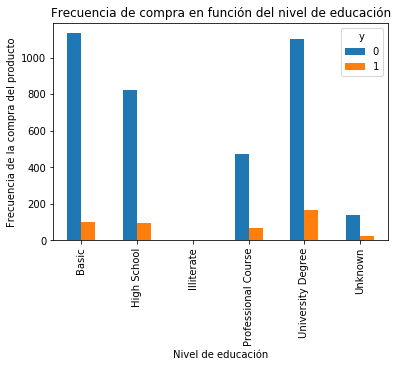

In [327]:
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del nivel de educación")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de la compra del producto")

Text(0, 0.5, 'Proporción de clientes')

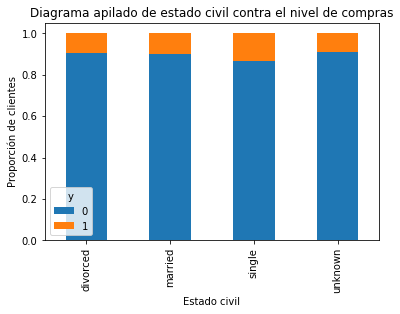

In [328]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de la compra del producto')

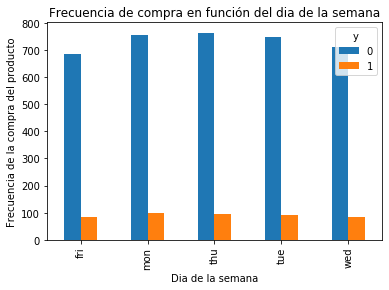

In [276]:
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de la compra del producto")

Text(0, 0.5, 'Proporción de clientes')

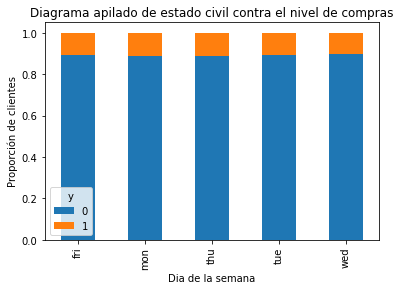

In [277]:
table=pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Dia de la semana")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Frecuencia de la compra del producto')

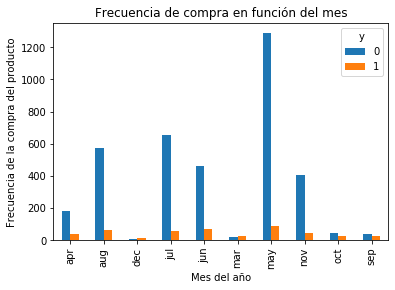

In [278]:
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en función del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de la compra del producto")

Text(0, 0.5, 'Proporción de clientes')

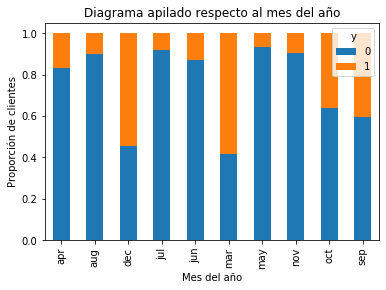

In [279]:
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado respecto al mes del año")
plt.xlabel("Mes del año")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Edad de los clientes')

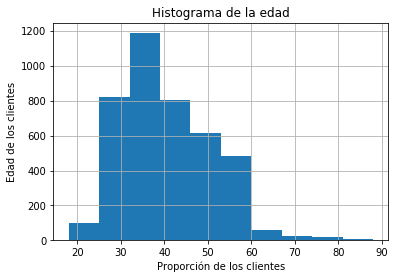

In [280]:
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Proporción de los clientes")
plt.ylabel("Edad de los clientes")

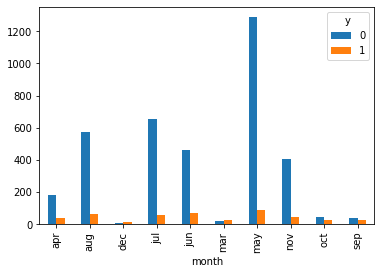

In [281]:
pd.crosstab(data.month, data.y).plot(kind="bar")

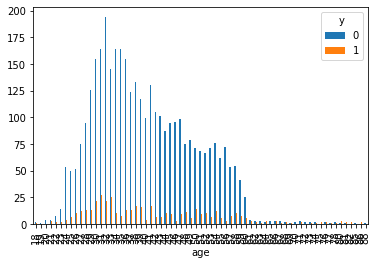

In [282]:
pd.crosstab(data.age, data.y).plot(kind="bar")

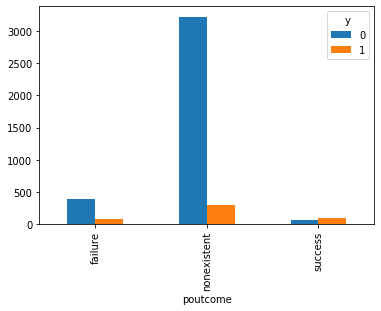

In [283]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

## Conversión de las variables categóricas a dummies

In [436]:
categories = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [437]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Illiterate',
       'education_Professional Course', 'education_University Degree',
       'education_Unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may

In [438]:
data_vars = data.columns.values.tolist()

In [439]:
to_keep=[v for v in data_vars if v not in categories]

bank_data=data[to_keep]

bank_data=bank_data.drop("default",axis=1)

In [440]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'default', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu'

In [441]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

### Selección de rasgos para el modelo

In [442]:
# Sacamos las variables más siginificativas pudiendo usar las variables que queramos, en este caso usamos 12
n = 12

In [443]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [444]:
lr = LogisticRegression()

In [421]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

ValueError: could not convert string to float: 'no'

In [423]:
bank_data.head()

,age,default,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,no,487,2,999,0,-1.8,92.893,-46.2,1.313,...,0,0,1,0,0,0,0,0,1,0
1,39,no,346,4,999,0,1.1,93.994,-36.4,4.855,...,0,0,1,0,0,0,0,0,1,0
2,25,no,227,1,999,0,1.4,94.465,-41.8,4.962,...,0,0,0,0,0,0,1,0,1,0
3,38,no,17,3,999,0,1.4,94.465,-41.8,4.959,...,0,0,1,0,0,0,0,0,1,0
4,47,no,58,1,999,0,-0.1,93.200,-42.0,4.191,...,0,0,0,1,0,0,0,0,1,0
